In [2]:
import pandas as pd
wine = pd.read_csv('http://bit.ly/wine_csv_data')

In [7]:
wine.head()

# class : 화이트 와인은 1 / 레드와인은 0
# alcohol : 알코올 농도
# sugar : 당도
# pH : ph값

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [13]:
# 누락된 데이터 확인.
wine.info()
# 누락된 값 없음
# 누락된 값이 있다면? 
# 훈련 세트의 통계 값으로 테스트 세트를 변환하므로
# 훈련 세트의 평균값으로 테스트 세트의 누락된 값을
# 채워야 함.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [15]:
# 열에 대한 간단한 통계 출력
# describe()
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [30]:

# pandas 에서 훈련데이터와 타깃데이터로 나누기

data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2 ,random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled,train_target), lr.score(test_scaled, test_target))

0.7808350971714451 0.7776923076923077


In [53]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, criterion = 'gini')
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target), dt.score(test_scaled, test_target))

0.996921300750433 0.8592307692307692


[Text(339.05319497019974, 371.8718181818182, 'X[1] <= -0.239\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(164.99331004349227, 354.57545454545453, 'X[1] <= -0.802\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(32.09095119201031, 337.2790909090909, 'X[1] <= -0.854\ngini = 0.184\nsamples = 1054\nvalue = [108, 946]'),
 Text(3.711340206185567, 319.98272727272723, 'X[2] <= 3.966\ngini = 0.032\nsamples = 555\nvalue = [9, 546]'),
 Text(2.9690721649484537, 302.6863636363636, 'X[2] <= -2.017\ngini = 0.025\nsamples = 553\nvalue = [7, 546]'),
 Text(1.4845360824742269, 285.39, 'X[2] <= -2.08\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.7422680412371134, 268.09363636363634, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(2.2268041237113403, 268.09363636363634, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(4.453608247422681, 285.39, 'X[1] <= -0.896\ngini = 0.022\nsamples = 545\nvalue = [6, 539]'),
 Text(3.711340206185567, 268.09363636363634, 'gini = 0.0\ns

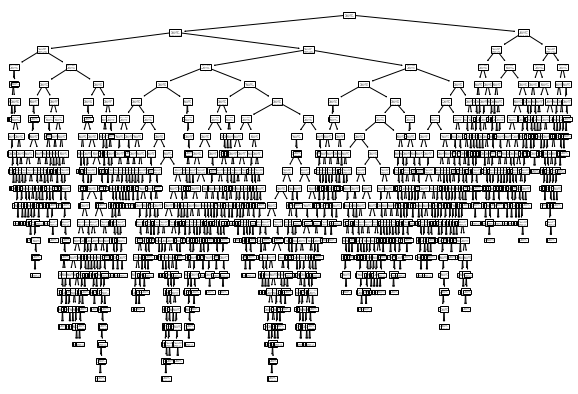

In [47]:
# 결정 트리를 이해하기 쉬운 트리 그림으로 출력하기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))
plot_tree(dt)

[Text(279.0, 317.09999999999997, 'sugar <= -0.239\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(139.5, 190.26, 'sugar <= -0.802\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(69.75, 63.420000000000016, '\n  (...)  \n'),
 Text(209.25, 63.420000000000016, '\n  (...)  \n'),
 Text(418.5, 190.26, 'sugar <= 0.204\ngini = 0.069\nsamples = 2275\nvalue = [81, 2194]'),
 Text(348.75, 63.420000000000016, '\n  (...)  \n'),
 Text(488.25, 63.420000000000016, '\n  (...)  \n')]

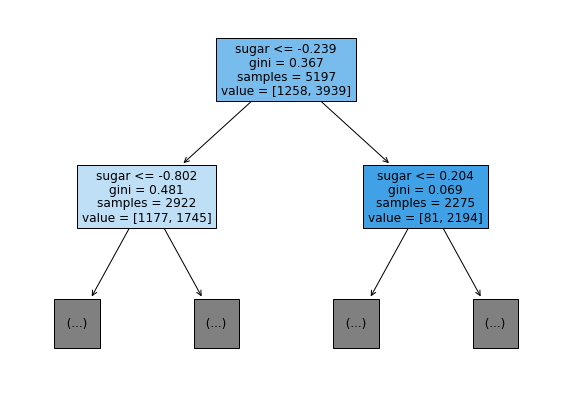

In [52]:
plt.figure(figsize = (10,7))
plot_tree(dt, max_depth=1, filled = True, feature_names=['alchol','sugar','pH'])

In [57]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled , train_target)
print(dt.score(train_scaled, train_target),dt.score(test_scaled, test_target))


0.8454877814123533 0.8415384615384616


[Text(558.0, 713.475, 'sugar <= -0.239\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(279.0, 509.625, 'sugar <= -0.802\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(139.5, 305.775, 'sugar <= -0.854\ngini = 0.184\nsamples = 1054\nvalue = [108, 946]'),
 Text(69.75, 101.92499999999995, 'gini = 0.032\nsamples = 555\nvalue = [9, 546]'),
 Text(209.25, 101.92499999999995, 'gini = 0.318\nsamples = 499\nvalue = [99, 400]'),
 Text(418.5, 305.775, 'alchol <= 0.454\ngini = 0.49\nsamples = 1868\nvalue = [1069, 799]'),
 Text(348.75, 101.92499999999995, 'gini = 0.42\nsamples = 1141\nvalue = [798, 343]'),
 Text(488.25, 101.92499999999995, 'gini = 0.468\nsamples = 727\nvalue = [271, 456]'),
 Text(837.0, 509.625, 'sugar <= 0.204\ngini = 0.069\nsamples = 2275\nvalue = [81, 2194]'),
 Text(697.5, 305.775, 'pH <= 0.238\ngini = 0.189\nsamples = 529\nvalue = [56, 473]'),
 Text(627.75, 101.92499999999995, 'gini = 0.098\nsamples = 329\nvalue = [17, 312]'),
 Text(767.25, 101.92499999

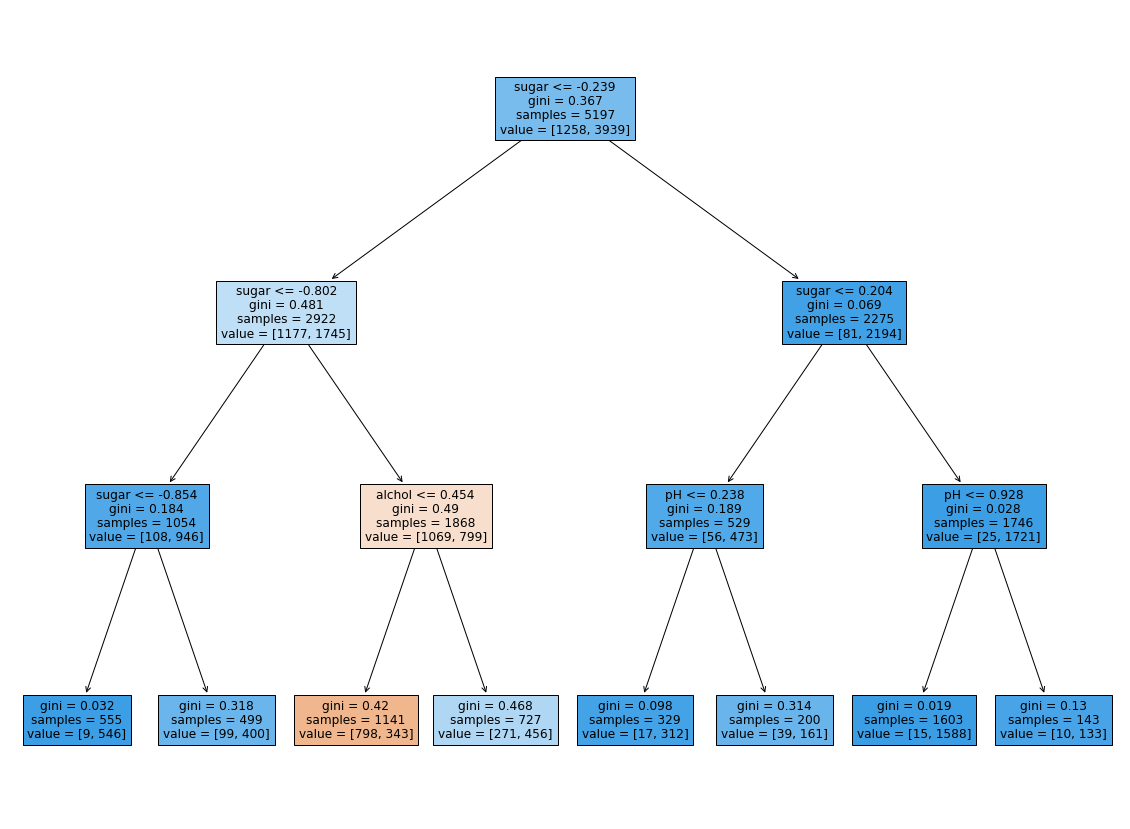

In [63]:
plt.figure(figsize = (20,15))
plot_tree(dt, filled = True , feature_names = ['alchol','sugar','pH'])


In [69]:
dt = DecisionTreeClassifier(max_depth=3, random_state = 42)
dt.fit(train_input , train_target)
print(dt.score(train_input, train_target), dt.score(test_input, test_target))

0.8454877814123533 0.8415384615384616


[Text(558.0, 713.475, 'sugar <= 4.325\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(279.0, 509.625, 'sugar <= 1.625\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(139.5, 305.775, 'sugar <= 1.375\ngini = 0.184\nsamples = 1054\nvalue = [108, 946]'),
 Text(69.75, 101.92499999999995, 'gini = 0.032\nsamples = 555\nvalue = [9, 546]'),
 Text(209.25, 101.92499999999995, 'gini = 0.318\nsamples = 499\nvalue = [99, 400]'),
 Text(418.5, 305.775, 'alcohol <= 11.025\ngini = 0.49\nsamples = 1868\nvalue = [1069, 799]'),
 Text(348.75, 101.92499999999995, 'gini = 0.42\nsamples = 1141\nvalue = [798, 343]'),
 Text(488.25, 101.92499999999995, 'gini = 0.468\nsamples = 727\nvalue = [271, 456]'),
 Text(837.0, 509.625, 'sugar <= 6.45\ngini = 0.069\nsamples = 2275\nvalue = [81, 2194]'),
 Text(697.5, 305.775, 'pH <= 3.255\ngini = 0.189\nsamples = 529\nvalue = [56, 473]'),
 Text(627.75, 101.92499999999995, 'gini = 0.098\nsamples = 329\nvalue = [17, 312]'),
 Text(767.25, 101.9249999999

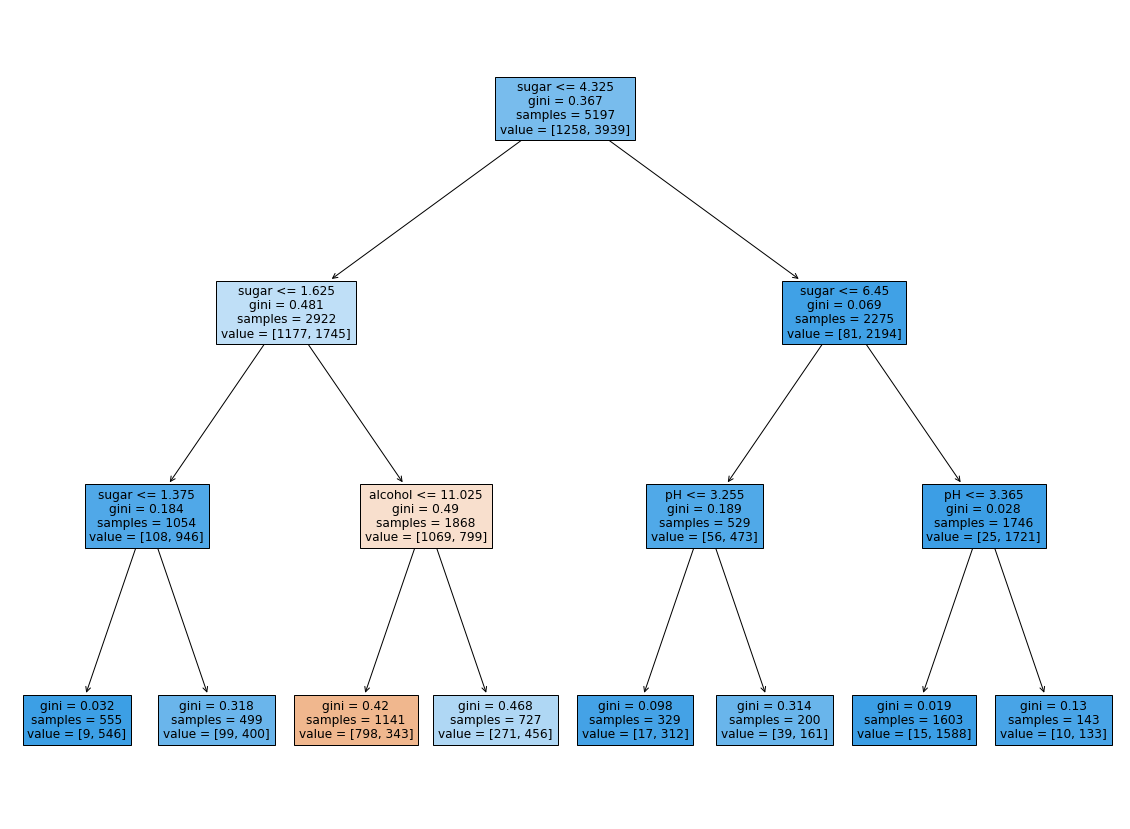

In [71]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])

In [79]:
print( dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
